In [1]:
import numpy as np
import json

k3 = np.load('./output/CST-hungarian-scvae-latent-batch/version_1/inference.npz')
k0 = np.load('./output/CST-hungarian-scvae-latent-batch/version_2/inference.npz')
val_indices = json.load(open('./output/CST-hungarian-scvae-latent-batch/version_1/dataset_meta.json'))['val_data_indices']

In [2]:
T = k3['T']
print(T.shape)

(584, 516)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set_context("paper")


In [4]:
def vis(label, T, y, gt_T, gt):
    plt.plot(T, y, label=label)
    plt.scatter(T[gt_T], gt, c='red')

In [5]:
def compare(cell, gene, fn=None):
    print(f'Cell {val_indices[cell]} Gene {gene}')
    vis('CST', k3['T'][cell], k3['y'][cell, :, gene], k3['gt_T'][cell], k3['gt'][cell, :, gene])
    vis('Transformer', k0['T'][cell], k0['y'][cell, :, gene], k0['gt_T'][cell], k0['gt'][cell, :, gene])
    plt.legend()
    if fn is not None:
        plt.savefig(fn)
    plt.show()

Cell 4 Gene 10


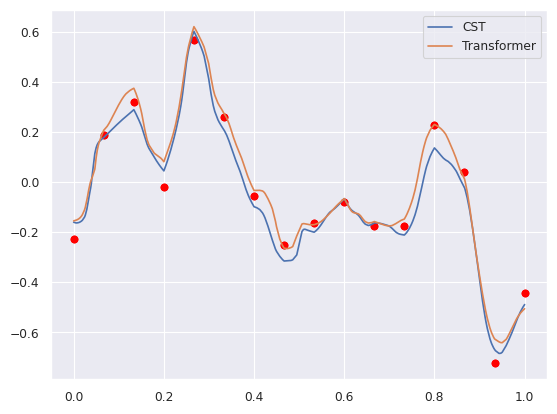

In [6]:
compare(0, 10, fn=f'imgs/hung/C_{val_indices[0]}_G_{10}')

Cell 1391 Gene 10


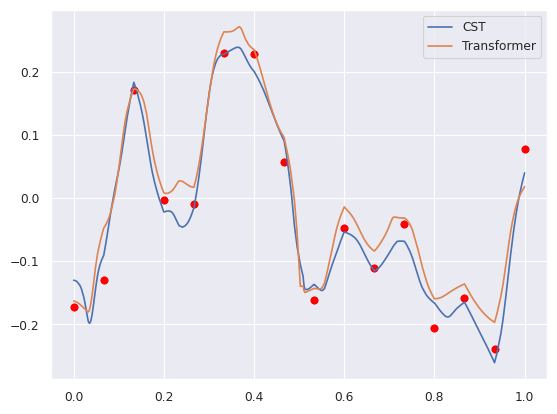

In [7]:
compare(400, 10, fn=f'imgs/hung/C_{val_indices[400]}_G_{10}')

Cell 4 Gene 60


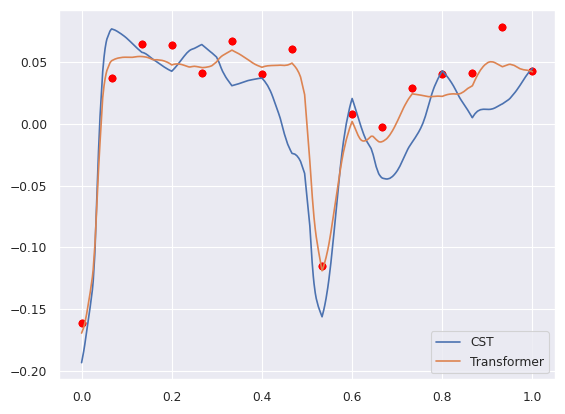

In [8]:
compare(0, 60, fn=f'imgs/hung/C_{val_indices[0]}_G_{60}')

Cell 1391 Gene 60


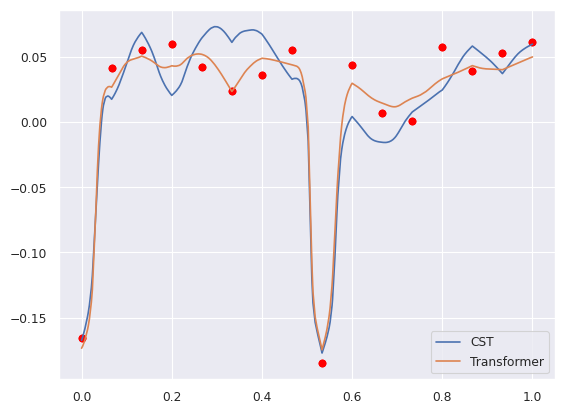

In [9]:
compare(400, 60, fn=f'imgs/hung/C_{val_indices[400]}_G_{60}')